In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = plt.imread('Downloads/mario.png')

converting the image to gray image to help detect edges as there is only one array it is easier to recognize the place where there is change in pixel value

In [3]:
def gray(image):
    red,blue,green=image[:,:,0],image[:,:,1],image[:,:,2]
    gray=(red+blue+green)/3
    return gray
gray_image=gray(image)

creating sobel matrix which will run through the image matrix and find the gradient at different position

In [4]:
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])

defining convolution function and applying gaussian blur to the gray image to decrease noise in the gray image

In [5]:
def convolve(image, kernel):
    h, w = image.shape
    convolved = np.zeros((h-2, w-2))  
    pad = np.pad(image, ((1, 1), (1, 1)), mode='edge')
    for i in range(1, h-1):
        for j in range(1, w-1):
            area = pad[i-1:i+2, j-1:j+2]
            convolved_value = np.sum(area * kernel)
            convolved[i-1, j-1] = convolved_value
    return convolved
blur_matrix=np.array([[1,2,1],
                      [2,4,2],
                      [1,2,1]])
gray_image=convolve(gray_image,blur_matrix)

applying convolution on the image matrix with the sobel matrix to detect edges

In [6]:
edges_x = convolve(gray_image, sobel_x)
edges_y = convolve(gray_image, sobel_y)

In [7]:
edges_combined = np.sqrt(edges_x ** 2 + edges_y ** 2)

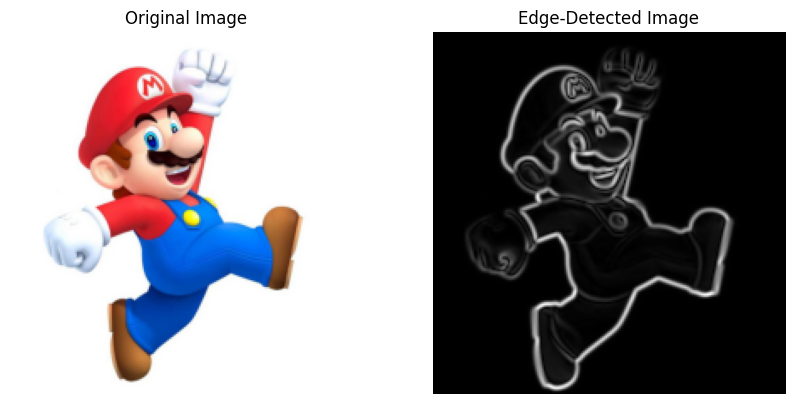

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(edges_combined, cmap='gray')
axes[1].set_title('Edge-Detected Image')
axes[1].axis('off')

plt.show()

doing the same step with scharr matrix

In [9]:
scharr_x = np.array([[-3, 0, 3],
                    [-10, 0, 10],
                    [-3, 0, 3]])

scharr_y = np.array([[-3, -10, -3],
                    [0, 0, 0],
                    [3, 10, 3]])

In [10]:
edges_x = convolve(gray_image, scharr_x)
edges_y = convolve(gray_image, scharr_y)

In [11]:
scharr_edges_combined = np.sqrt(edges_x ** 2 + edges_y ** 2)

the color map of edge detected image is set gray since it is a gray image

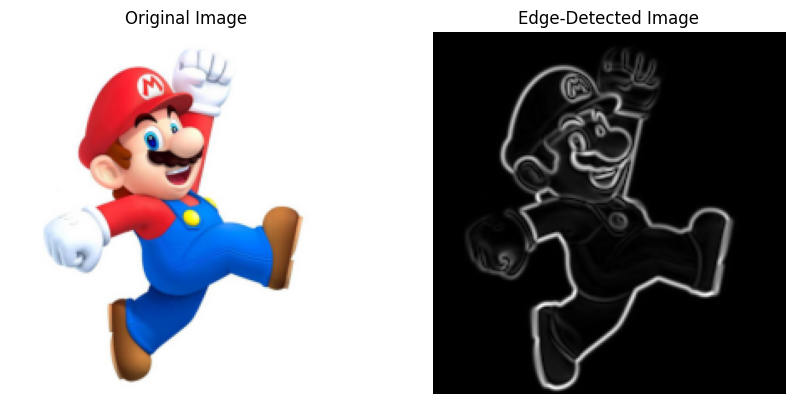

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(scharr_edges_combined, cmap='gray')
axes[1].set_title('Edge-Detected Image')
axes[1].axis('off')

plt.show()

comparing the two image side by side there is not much difference between the edge detected images by scharr and sobel

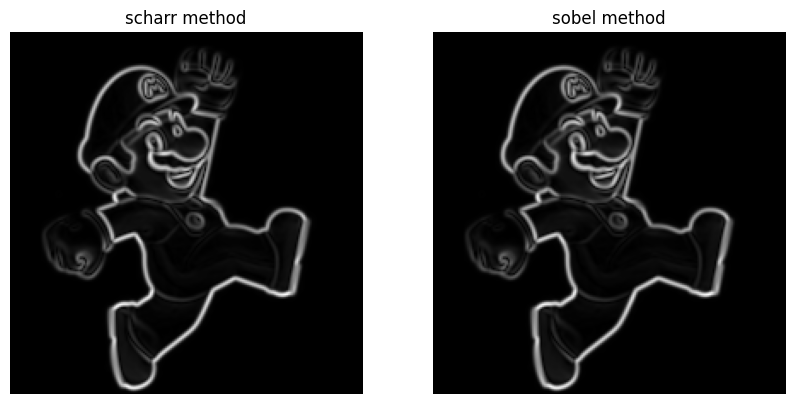

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(scharr_edges_combined, cmap='gray')
axes[0].set_title('scharr method')
axes[0].axis('off')
axes[1].imshow(edges_combined, cmap='gray')
axes[1].set_title('sobel method')
axes[1].axis('off')

plt.show()

using laplacian fucntion to detect edge,this funciton uses the double derivative to detect the edge

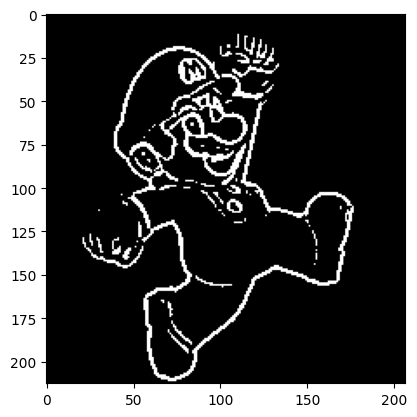

In [14]:
gauss=np.array([[0,-1,0],
               [-1,4,-1],
               [0,-1,0]])
temp=convolve(gray_image,gauss)
threshold=.45
gauss_edge=(temp>threshold)*255
plt.imshow(gauss_edge,cmap='gray')